Лабораторная работа №4

In [1]:
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from kneed import KneeLocator
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

Подготовка данных

In [4]:
df = pd.read_csv('dataset.csv')
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [5]:
x = df.drop(['Quality'], axis=1)
y = df['Quality'].values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=55)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
labelEncoder = preprocessing.LabelEncoder()
Y_train = labelEncoder.fit_transform(Y_train)
Y_test = labelEncoder.fit_transform(Y_test)

# Подбор параметров

In [9]:
layerSizes = range(50, 1001, 50)

train_scores = []
test_scores = []

for layerSize in layerSizes:
    mlp = MLPClassifier(hidden_layer_sizes=layerSize, early_stopping=True, random_state=55)
    mlp.fit(X_train, Y_train)

    train_score = mlp.score(X_train, Y_train)
    test_score = cross_val_score(mlp, X_test, Y_test).mean()

    train_scores.append(train_score)
    test_scores.append(test_score)

    print(str(layerSize) + ' layer size: ' + str(train_score) + ' | ' + str(test_score))

50 layer size: 0.9628125 | 0.93
100 layer size: 0.969375 | 0.9193749999999999
150 layer size: 0.97125 | 0.9200000000000002
200 layer size: 0.97125 | 0.9275
250 layer size: 0.97125 | 0.9487500000000001
300 layer size: 0.9684375 | 0.946875
350 layer size: 0.97953125 | 0.953125
400 layer size: 0.9678125 | 0.95375
450 layer size: 0.97484375 | 0.9106249999999999
500 layer size: 0.98015625 | 0.9349999999999999
550 layer size: 0.9696875 | 0.9512500000000002
600 layer size: 0.969375 | 0.9525
650 layer size: 0.97265625 | 0.9524999999999999
700 layer size: 0.98296875 | 0.9525
750 layer size: 0.9809375 | 0.951875
800 layer size: 0.9809375 | 0.9568749999999999
850 layer size: 0.97578125 | 0.9425000000000001
900 layer size: 0.974375 | 0.9481250000000001
950 layer size: 0.97515625 | 0.954375
1000 layer size: 0.985 | 0.9481249999999999


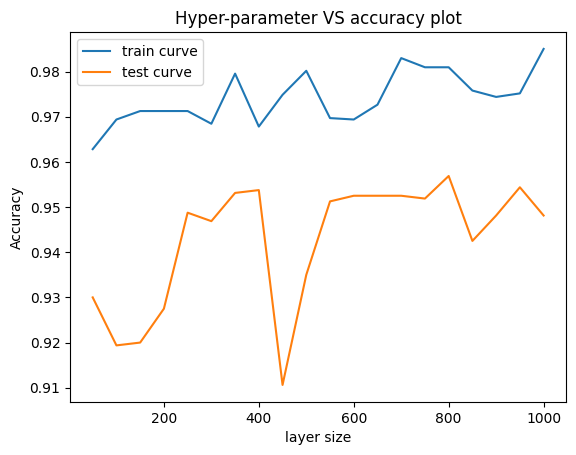

In [10]:
params = layerSizes
plt.plot(params, train_scores, label='train curve')
plt.plot(params, test_scores, label='test curve')
plt.xlabel("layer size")
plt.ylabel("Accuracy")
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [11]:
layerSize = 800

In [12]:
# 'lbfgs' is an optimizer in the family of quasi-Newton methods.
# 'sgd' refers to stochastic gradient descent.
# 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
solvers = ['lbfgs', 'sgd', 'adam']

train_scores = []
test_scores = []

for solver in solvers:
    mlp = MLPClassifier(hidden_layer_sizes=layerSize, early_stopping=True, random_state=55, solver=solver)
    mlp.fit(X_train, Y_train)

    train_score = mlp.score(X_train, Y_train)
    test_score = cross_val_score(mlp, X_test, Y_test).mean()

    train_scores.append(train_score)
    test_scores.append(test_score)

    print('Solver ' + solver + ': ' + str(train_score) + ' | ' + str(test_score))

Solver lbfgs: 1.0 | 0.9662499999999999
Solver sgd: 0.92578125 | 0.889375
Solver adam: 0.9809375 | 0.9568749999999999


In [13]:
solver = 'lbfgs'

In [14]:
# 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x
# 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
# 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).
# 'relu', the rectified linear unit function, returns f(x) = max(0, x)
activators = ['identity', 'logistic', 'tanh', 'relu']

train_scores = []
test_scores = []

for activator in activators:
    mlp = MLPClassifier(hidden_layer_sizes=layerSize, early_stopping=True, random_state=55, solver=solver, activation=activator)
    mlp.fit(X_train, Y_train)

    train_score = mlp.score(X_train, Y_train)
    test_score = cross_val_score(mlp, X_test, Y_test).mean()

    train_scores.append(train_score)
    test_scores.append(test_score)

    print('Activator ' + activator + ': ' + str(train_score) + ' | ' + str(test_score))

Activator identity: 0.87734375 | 0.8793749999999999
Activator logistic: 0.87703125 | 0.8806249999999999
Activator tanh: 1.0 | 0.96875
Activator relu: 1.0 | 0.9662499999999999


In [15]:
activator = 'tanh'

In [16]:
iterations = range(100, 501, 100)

train_scores = []
test_scores = []

for iteration in iterations:
    mlp = MLPClassifier(hidden_layer_sizes=layerSize, early_stopping=True, random_state=55, solver=solver, activation=activator, max_iter=iteration)
    mlp.fit(X_train, Y_train)

    train_score = mlp.score(X_train, Y_train)
    test_score = cross_val_score(mlp, X_test, Y_test).mean()

    train_scores.append(train_score)
    test_scores.append(test_score)

    print(str(iteration) + ' iterations: ' + str(train_score) + ' | ' + str(test_score))

100 iterations: 0.9909375 | 0.96875
200 iterations: 1.0 | 0.96875
300 iterations: 1.0 | 0.96875
400 iterations: 1.0 | 0.96875
500 iterations: 1.0 | 0.96875
600 iterations: 1.0 | 0.96875
700 iterations: 1.0 | 0.96875
800 iterations: 1.0 | 0.96875
900 iterations: 1.0 | 0.96875
1000 iterations: 1.0 | 0.96875


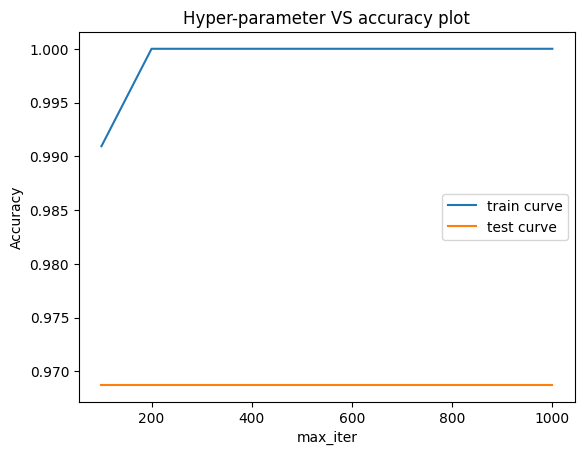

In [17]:
params = iterations
plt.plot(params, train_scores, label='train curve')
plt.plot(params, test_scores, label='test curve')
plt.xlabel("max_iter")
plt.ylabel("Accuracy")
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [18]:
iteration = 200

# Итог

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       749
           1       0.98      0.97      0.98       851

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



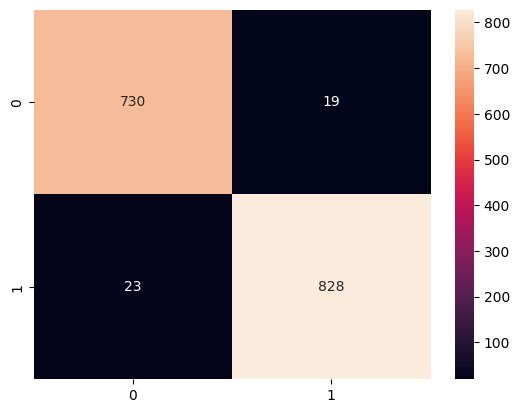

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=layerSize, early_stopping=True, random_state=55, solver=solver, activation=activator, max_iter=iteration)
mlp.fit(X_train, Y_train)

Y_predict = mlp.predict(X_test)

cm = pd.DataFrame(confusion_matrix(Y_test, Y_predict))
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(Y_test, Y_predict))